In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Add more libraries below this line as needed.

In [2]:
import os
import env
import acquire
import wrangle
import explore

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.
Imported prepare.py successfully


# Acquire

In [3]:
df = wrangle.get_zillow_data()
df.shape

(77381, 70)

In [4]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [6]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,pid
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,50.000000,...,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000,7.738100e+04
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,679.720000,...,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.692754,0.016625,1.300715e+07
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,689.703546,...,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.429065,0.170191,3.481346e+06
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420,1.071186e+07
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,273.000000,...,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19461.000000,-0.024377,1.153830e+07
50%,1.253157e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.497932e+06,515.000000,...,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38870.000000,0.006627,1.253157e+07
75%,1.421183e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240535e+06,796.500000,...,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58253.000000,0.039203,1.421183e+07
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,1.676893e+08


# Prep

### First step, remove columns that I know I won't be needing

A lot of missing values, however I will remove the columns I don't think I'll be needing first, then address missing rows.

In [7]:
# Dropping columns I don't think I'll need. If I do end up needing them, come back to this point after the MVP is done.

df = wrangle.drop_cols(df)
df.shape

(77381, 50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   basementsqft                  50 non-null     float64
 7   bathroomcnt                   77381 non-null  float64
 8   bedroomcnt                    77381 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6023 non-null   float64
 11  calculatedfinishedsquarefeet  77185 non-null  float64
 12  finishedsquarefeet13          41 non-null     float64
 13  f

In [9]:
# I need to isolate down to only single unit properties, which equate to this list:

id_list = [261.0, 260.0, 262.0, 263.0, 264.0]

In [10]:
# Now I have 20k less rows, so good for the most part. Now need to cut down the columns:

df = wrangle.prep_data(df, id_list)
df.shape

(52244, 50)

In [11]:
df = wrangle.handle_missing_values(df, col_limit = .6, row_limit = .6)
df.shape

(52244, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52244 entries, 0 to 77380
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52244 non-null  float64
 1   bathroomcnt                   52244 non-null  float64
 2   bedroomcnt                    52244 non-null  float64
 3   calculatedfinishedsquarefeet  52236 non-null  float64
 4   fips                          52244 non-null  float64
 5   latitude                      52244 non-null  float64
 6   longitude                     52244 non-null  float64
 7   lotsizesquarefeet             51883 non-null  float64
 8   regionidcity                  51216 non-null  float64
 9   roomcnt                       52244 non-null  float64
 10  yearbuilt                     52204 non-null  float64
 11  structuretaxvaluedollarcnt    52172 non-null  float64
 12  taxvaluedollarcnt             52243 non-null  float64
 13  l

In [13]:
# I don't need this column any more.
df.drop(columns = ['propertylandusetypeid'], inplace = True)


In [14]:
df.isna().sum().sort_values(ascending = False)

regionidcity                    1028
lotsizesquarefeet                361
structuretaxvaluedollarcnt        72
yearbuilt                         40
calculatedfinishedsquarefeet       8
taxamount                          4
landtaxvaluedollarcnt              1
taxvaluedollarcnt                  1
logerror                           0
roomcnt                            0
longitude                          0
latitude                           0
fips                               0
bedroomcnt                         0
bathroomcnt                        0
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum().sort_values(ascending = False)

logerror                        0
taxamount                       0
landtaxvaluedollarcnt           0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
yearbuilt                       0
roomcnt                         0
regionidcity                    0
lotsizesquarefeet               0
longitude                       0
latitude                        0
fips                            0
calculatedfinishedsquarefeet    0
bedroomcnt                      0
bathroomcnt                     0
dtype: int64

## Things on my mind:

- Will clustering be beneficial to my understanding of the data and relationships
- Are there new features I can create from my current feature list that will do a better job of predicting `logerror`?

In [16]:
pd.set_option('display.max_columns', 40)

# Adding new dummy columns:

county_df = pd.get_dummies(df.fips)
county_df.head(1)

county_df.columns = ["LA", "Orange", "Ventura"]
# df_dummies = pd.concat([df, county_df], axis = 1)
df = pd.concat([df, county_df], axis = 1)
print(df.shape)
df.head(1)

(50800, 18)


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura
0,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,53571.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,0,1,0


In [17]:
# adding features:

def create_features(df):
    df['age'] = 2017 - df.yearbuilt

    # create taxrate variable
    df['taxrate'] = df.taxamount/df.taxvaluedollarcnt
    
    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560
    
    # dollar per square foot-structure
    df['structure_dollar_per_sqft'] = df.structuretaxvaluedollarcnt/df.calculatedfinishedsquarefeet

    # dollar per square foot-land
    df['land_dollar_per_sqft'] = df.landtaxvaluedollarcnt/df.lotsizesquarefeet
    
    # ratio of beds to baths
    df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt
    
    
    
    return df

In [20]:
df = create_features(df)

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

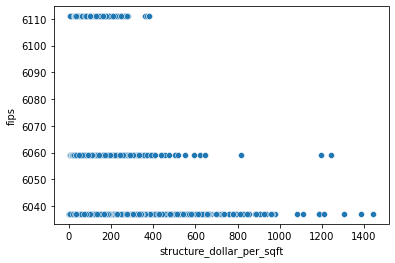

In [21]:
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

# Note there are only about 8 outliers that are making the 4th quartile to the max value extremely large compared to the rest of the quartiles.
# These kind of outliers will greatly affect the clustering models. Need to remove them.

In [22]:
# Need to remove outliers because outliers have a very large negative impact on clustering.

def remove_outliers():
    '''
    remove outliers in in structure dollars and land dollars.
    '''

    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) &  
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.acres < 10) &
               (df.calculatedfinishedsquarefeet < 7000) & 
               (df.taxrate < .05) &
               (df.structure_dollar_per_sqft < 1001) &
               (df.land_dollar_per_sqft < 1501)
              )]

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='fips'>

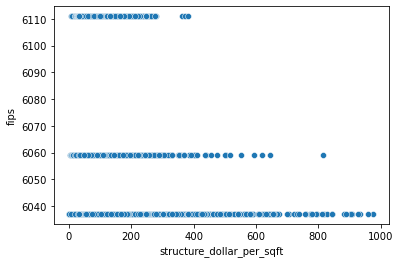

In [23]:
df = remove_outliers()
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'fips', data = df)

In [ ]:
sns.scatterplot(x = 'land_dollar_per_sqft', y = 'structure_dollar_per_sqft', data = df)

In [24]:
df.isnull().sum().sort_values(ascending = False)

bed_bath_ratio                  0
land_dollar_per_sqft            0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidcity                    0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
bathroomcnt                     0
dtype: int64

In [ ]:
df_la = df[df.LA == 1].drop(columns = ['Orange', 'Ventura'])
df_la.shape

In [ ]:
df_o = df[df.Orange == 1].drop(columns = ['LA', 'Ventura'])
df_v = df[df.Ventura == 1].drop(columns = ['Orange', 'LA'])
df_o.shape, df_v.shape

In [ ]:
df_la.head(1)

In [ ]:
# Checking to see the count of fips in each new county df. Making sure there wasn't any leakage between them.

df_la.fips.value_counts(), df_o.fips.value_counts(), df_v.fips.value_counts(),

At this point, I'd want to do everything in triplets, but I think that'll take too long so I'm going to continue using the main dataframe and just add a county column so that I can still divide things by county.

I'll end up with 3 dataframes per county df, which means a total of 9 dataframes... That seems like a bit much, at least for an MVP.

In [ ]:
# I no longer need this column:

# df = df.drop(columns = "propertylandusetypeid")
# df.drop(columns = ['regionidcity', 'regionidcounty', 'unitcnt'], inplace = True)
df.info()

In [ ]:
df.head()

## Splitting Data

In [ ]:
train, validate, test = wrangle.split_zillow_data(df)

In [ ]:
# Impute missing values
train.isna().sum().sort_values(ascending = False)

In [ ]:
# No need to run this since there are no missing values...

train, validate, test = wrangle.impute_missing_values_all(train, validate, test)
train.head()

# Don't forget to .cut() in this area
# bin by age of house, county, tax bracket, and sq footage for starters

In [25]:
X_train, X_validate, X_test, X_train_explore, X_train_explore_scaled, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = explore.split_scale(df)

In [26]:
X_train.shape, X_train_scaled.shape, X_train_explore.shape

((28246, 23), (28246, 23), (28246, 24))

## End of prep:

- All missing values accounted for
- All columns still in dataframe are ones I need for analysis
- Data not yet scaled, need to accomplish this before moving on with rest of Explore stage

## *Outliers still need to be dealt with after the MVP is complete*

# Explore Stage

- Based on Faith's advice for the MVP, I will be exploring based upon unscaled train, validate, and test data.
- However, when it comes time to model, I'll need to scale the data. I would prefer to have that step completed at end of prep, so will add scaling section here
### y_train ==  `logerror`

In [27]:
X_train_explore.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
15372,2.0,3.0,1256.0,6037.0,34.131750,-117.837678,8492.0,11626.0,0.0,1961.0,80137.0,111961.0,31824.0,1603.28,0.040576,1,0,0,56.0,0.014320,0.194949,63.803344,3.747527,1.500000
25551,1.0,2.0,1212.0,6037.0,33.896194,-118.296552,8551.0,45398.0,0.0,1924.0,74000.0,370000.0,296000.0,4657.83,-0.220377,1,0,0,93.0,0.012589,0.196304,61.056106,34.615834,2.000000
35475,2.0,3.0,1194.0,6037.0,34.188469,-118.605795,6899.0,12447.0,0.0,1954.0,95269.0,476345.0,381076.0,5879.69,-0.017587,1,0,0,63.0,0.012343,0.158379,79.789782,55.236411,1.500000
33783,2.5,4.0,2475.0,6059.0,33.807010,-117.836975,6515.0,33252.0,8.0,1964.0,164614.0,623172.0,458558.0,6786.14,-0.015516,0,1,0,53.0,0.010890,0.149564,66.510707,70.384958,1.600000
5437,3.0,5.0,2603.0,6037.0,34.293665,-118.500322,12342.0,12447.0,0.0,1966.0,92139.0,135604.0,43465.0,1894.99,-0.006203,1,0,0,51.0,0.013974,0.283333,35.397234,3.521714,1.666667


In [28]:

value_vars = ['calculatedfinishedsquarefeet', 'taxrate', 'structure_dollar_per_sqft']

def elbow_plot(cluster_vars):
    # elbow method to identify good k for us
    ks = range(2,20)
    
    # empty list to hold inertia (sum of squares)
    sse = []

    # loop through each k, fit kmeans, get inertia
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_train_scaled[cluster_vars])
        # inertia
        sse.append(kmeans.inertia_)

    print(pd.DataFrame(dict(k=ks, sse=sse)))

    # plot k with inertia
    plt.plot(ks, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Elbow method to find optimal k')
    plt.show()

     k         sse
0    2  365.241231
1    3  276.434672
2    4  220.696991
3    5  186.869484
4    6  167.806442
5    7  150.400744
6    8  135.707062
7    9  124.217099
8   10  115.011059
9   11  107.464095
10  12  101.485447
11  13   95.835101
12  14   91.026964
13  15   86.154865
14  16   82.630828
15  17   78.945778
16  18   75.476347
17  19   72.659926


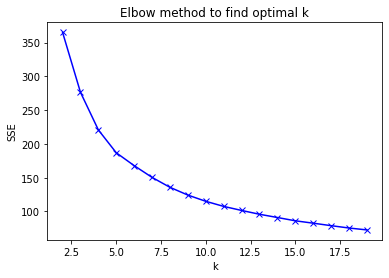

In [29]:
elbow_plot(cluster_vars = value_vars)

In [30]:
k = 6

def run_kmeans(k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

In [31]:
train_clusters, kmeans = run_kmeans(k=5, cluster_vars = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'], cluster_col_name = 'value_cluster')

In [32]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714


In [33]:
# Getting the centroids:

centroid_col_names = ['centroid_' + i for i in value_vars]
centroid_col_names

centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': 'value_cluster'})

In [34]:
centroids

,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
0,0,0.230489,0.513434,0.172959
1,1,0.207295,0.309507,0.188711
2,2,0.362661,0.499013,0.347894
3,3,0.595287,0.628698,0.608876
4,4,0.131843,0.221418,0.005067


In [35]:
centroids.shape, X_train_explore.shape, X_train_explore_scaled.shape, X_train_scaled.shape, X_train.shape

((5, 4), (28246, 24), (28246, 24), (28246, 23), (28246, 23))

In [36]:

# concatenate cluster id
X_train = pd.concat([X_train, train_clusters], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids, how='left', on='value_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters], 
                           axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids, how='left', on='value_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore = pd.concat([X_train_explore, train_clusters], 
                           axis=1)

# join on clusterid to get centroids
X_train_explore = X_train_explore.merge(centroids, how='left', on='value_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore_scaled = pd.concat([X_train_explore_scaled, train_clusters], 
                           axis=1)

# join on clusterid to get centroids
X_train_explore_scaled = X_train_explore_scaled.merge(centroids, how='left', on='value_cluster').\
                set_index(X_train.index)

In [37]:
X_train_explore.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
15372,2.0,3.0,1256.0,6037.0,34.131750,-117.837678,8492.0,11626.0,0.0,1961.0,80137.0,111961.0,31824.0,1603.28,0.040576,1,0,0,56.0,0.014320,0.194949,63.803344,3.747527,1.500000,1,0.207295,0.309507,0.188711
25551,1.0,2.0,1212.0,6037.0,33.896194,-118.296552,8551.0,45398.0,0.0,1924.0,74000.0,370000.0,296000.0,4657.83,-0.220377,1,0,0,93.0,0.012589,0.196304,61.056106,34.615834,2.000000,4,0.131843,0.221418,0.005067
35475,2.0,3.0,1194.0,6037.0,34.188469,-118.605795,6899.0,12447.0,0.0,1954.0,95269.0,476345.0,381076.0,5879.69,-0.017587,1,0,0,63.0,0.012343,0.158379,79.789782,55.236411,1.500000,1,0.207295,0.309507,0.188711
33783,2.5,4.0,2475.0,6059.0,33.807010,-117.836975,6515.0,33252.0,8.0,1964.0,164614.0,623172.0,458558.0,6786.14,-0.015516,0,1,0,53.0,0.010890,0.149564,66.510707,70.384958,1.600000,2,0.362661,0.499013,0.347894
5437,3.0,5.0,2603.0,6037.0,34.293665,-118.500322,12342.0,12447.0,0.0,1966.0,92139.0,135604.0,43465.0,1894.99,-0.006203,1,0,0,51.0,0.013974,0.283333,35.397234,3.521714,1.666667,2,0.362661,0.499013,0.347894


     k         sse
0    2  139.189345
1    3  111.520875
2    4   90.823861
3    5   76.037241
4    6   64.380531
5    7   54.670745
6    8   47.740039
7    9   42.121476
8   10   37.454788
9   11   33.918019
10  12   31.267131
11  13   29.192379
12  14   27.207100
13  15   25.257945
14  16   23.560231
15  17   22.180912
16  18   21.381856
17  19   20.022362


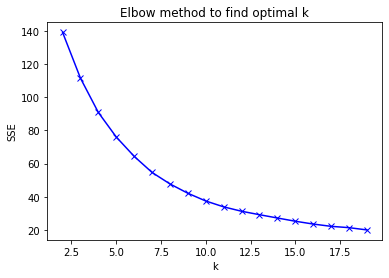

In [38]:
# Adding the second cluster:

cluster_vars = ['structure_dollar_per_sqft', 'land_dollar_per_sqft', 'acres']
elbow_plot(cluster_vars)

In [39]:
# Right at 5 centroids again. So we'll set our kmeans k = 5:

train_clusters2, kmeans2 = run_kmeans(k=5, cluster_vars = cluster_vars, cluster_col_name = 'land_cluster')

In [40]:
train_clusters2.land_cluster.value_counts()

4    15690
0    11165
2      766
3      419
1      206
Name: land_cluster, dtype: int64

In [41]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,1,0.207295,0.309507,0.188711
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,4,0.131843,0.221418,0.005067
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,1,0.207295,0.309507,0.188711
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,2,0.362661,0.499013,0.347894
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,2,0.362661,0.499013,0.347894


In [42]:
def get_centroids(cluster_vars, cluster_col_name):
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

In [43]:
centroids2 = get_centroids(cluster_vars, cluster_col_name='land_cluster')

In [ ]:
# def add_to_train_frame(X_train, X_train_scaled, X_train_explore, X_train_explore_scaled, cluster_col_name):
#     # concatenate cluster id
#     X_train = pd.concat([X_train, train_clusters], axis=1)

#     # join on clusterid to get centroids
#     X_train = X_train.merge(centroids, how='left', on=cluster_col_name).\
#                     set_index(X_train.index)

#     # concatenate cluster id
#     X_train_scaled = pd.concat([X_train_scaled, train_clusters], 
#                             axis=1)

#     # join on clusterid to get centroids
#     X_train_scaled = X_train_scaled.merge(centroids, how='left', on=cluster_col_name).\
#                     set_index(X_train.index)

#     # concatenate cluster id
#     X_train_explore = pd.concat([X_train_explore, train_clusters], 
#                             axis=1)

#     # join on clusterid to get centroids
#     X_train_explore = X_train_explore.merge(centroids, how='left', on=cluster_col_name).\
#                     set_index(X_train.index)

#     # concatenate cluster id
#     X_train_explore_scaled = pd.concat([X_train_explore_scaled, train_clusters], 
#                             axis=1)

#     # join on clusterid to get centroids
#     X_train_explore_scaled = X_train_explore_scaled.merge(centroids, how='left', on=cluster_col_name).\
#                     set_index(X_train.index)
    
#     return X_train, X_train_scaled, X_train_explore, X_train_explore_scaled

In [45]:
# concatenate cluster id
X_train = pd.concat([X_train, train_clusters2], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids2, how='left', on='land_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_scaled = pd.concat([X_train_scaled, train_clusters2], 
                        axis=1)

# join on clusterid to get centroids
X_train_scaled = X_train_scaled.merge(centroids2, how='left', on='land_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore = pd.concat([X_train_explore, train_clusters2], 
                        axis=1)

# join on clusterid to get centroids
X_train_explore = X_train_explore.merge(centroids2, how='left', on='land_cluster').\
                set_index(X_train.index)

# concatenate cluster id
X_train_explore_scaled = pd.concat([X_train_explore_scaled, train_clusters2], 
                        axis=1)

# join on clusterid to get centroids
X_train_explore_scaled = X_train_explore_scaled.merge(centroids2, how='left', on='land_cluster').\
                set_index(X_train.index)

In [58]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft_x,land_cluster,centroid_structure_dollar_per_sqft_y,centroid_land_dollar_per_sqft,centroid_acres
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,1,0.207295,0.309507,0.188711,4,0.131843,0.221418,0.005067
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,4,0.131843,0.221418,0.005067,4,0.131843,0.221418,0.005067
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,1,0.207295,0.309507,0.188711,4,0.131843,0.221418,0.005067
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,2,0.362661,0.499013,0.347894,4,0.131843,0.221418,0.005067
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,2,0.362661,0.499013,0.347894,4,0.131843,0.221418,0.005067


In [59]:
X_train_explore_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,value_cluster,centroid_calculatedfinishedsquarefeet,centroid_taxrate,centroid_structure_dollar_per_sqft_x,land_cluster,centroid_structure_dollar_per_sqft_y,centroid_land_dollar_per_sqft,centroid_acres
15372,0.166667,0.333333,0.161333,0.000000,0.537461,0.860562,0.018427,0.020696,0.000000,0.595588,0.022352,0.003953,0.001324,0.005387,0.599659,1.0,0.0,0.0,0.404412,0.286140,0.018427,0.066195,0.002551,0.250000,1,0.207295,0.309507,0.188711,4,0.131843,0.221418,0.005067
25551,0.000000,0.166667,0.154903,0.000000,0.377387,0.619421,0.018563,0.106616,0.000000,0.323529,0.020621,0.014124,0.013153,0.015976,0.566337,1.0,0.0,0.0,0.676471,0.251318,0.018563,0.063330,0.023771,0.357143,4,0.131843,0.221418,0.005067,4,0.131843,0.221418,0.005067
35475,0.166667,0.333333,0.152272,0.000000,0.576005,0.456912,0.014764,0.022785,0.000000,0.544118,0.026621,0.018316,0.016962,0.020211,0.592232,1.0,0.0,0.0,0.455882,0.246383,0.014764,0.082868,0.037946,0.250000,1,0.207295,0.309507,0.188711,4,0.131843,0.221418,0.005067
33783,0.250000,0.500000,0.339471,0.297297,0.316782,0.860932,0.013880,0.075715,0.571429,0.617647,0.046182,0.024103,0.020432,0.023354,0.592496,0.0,1.0,0.0,0.382353,0.217144,0.013880,0.069019,0.048360,0.271429,2,0.362661,0.499013,0.347894,4,0.131843,0.221418,0.005067
5437,0.333333,0.666667,0.358176,0.000000,0.647492,0.512339,0.027282,0.022785,0.000000,0.632353,0.025738,0.004885,0.001845,0.006399,0.593686,1.0,0.0,0.0,0.367647,0.279190,0.027282,0.036570,0.002396,0.285714,2,0.362661,0.499013,0.347894,4,0.131843,0.221418,0.005067


### Hypothesis Test:

##### Features: `acres` and `structure_dollar_per_sqft` and `land_dollar_per_sqft`

$H_0$: The population means for the 5 clusters are all equal (**no** significant difference)

$H_a$: The population means for the 5 clusters are not equal (there **is** a significant difference)

In [61]:
alpha = .05

cluster_one = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 0].logerror
cluster_two = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 1].logerror
cluster_three = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 2].logerror
cluster_four = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 3].logerror
cluster_five = X_train_explore_scaled[X_train_explore_scaled.land_cluster == 4].logerror

In [62]:
cluster_one

16209    0.594816
69057    0.595110
45906    0.601276
52601    0.596603
48492    0.594762
           ...   
27401    0.596558
34465    0.599283
50103    0.577538
6374     0.592030
51778    0.584953
Name: logerror, Length: 11165, dtype: float64

In [63]:
import scipy.stats as stats

f, p = stats.f_oneway(cluster_one, cluster_two, cluster_three, cluster_four, cluster_five)
f, p

(2.404356324072305, 0.04741498655136483)

In [64]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject the null hypothesis


In [ ]:
# For a simple visual answer, I'm going to use a scatterplot, with logerror being the value.

sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = train, hue = 'fips')

In [ ]:
sns.scatterplot(x = 'latitude', y = 'logerror', data = train, hue = 'fips')

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="fips", data=train)

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="structure_dollar_per_sqft", data=train)

In [ ]:
# Are there any features that I want to create from the existing data? Any I want to take away?
# First let's check the distributions of the existing cleaned columns:

In [ ]:
# separating by county
# Adding back a county column to the train df in order to viz the counties:
train_viz = train.copy()

# converting fips code to int. Will need to convert to string if I import into Tableau.
train_viz['fips'] = train_viz['fips'].astype('int')

conditions = [
    (train_viz['fips'] == 6037),
    (train_viz['fips'] == 6059),
    (train_viz['fips'] == 6111)
    ]

county_list = ['Los Angeles', 'Orange', 'Ventura']

train_viz['county'] = np.select(conditions, county_list)
train_viz.shape
sns.relplot(x="longitude", y="latitude", hue="county", data=train_viz)

## Can I visualize any significant relationship between logerror and any of my current features?

In [ ]:
# I'm not seeing any... And if I can't find any, not sure what to test or model on...

sns.catplot(x = 'fips', y = 'logerror', data = train)

In [47]:
from sklearn.feature_selection import SelectKBest, f_regression

In [67]:
# RFE:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 5)

lm_X_rfe = rfe.fit_transform(X_train,y_train) 


## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 5 features: yearbuilt, LA, Orange, Ventura, age


In [68]:
from sklearn.feature_selection import SelectKBest, f_regression

In [69]:
f_selector = SelectKBest(f_regression, k=5)

# we are running the scaled train data through kbest
f_selector = f_selector.fit(X_train_scaled, y_train.logerror)

X_train_reduced = f_selector.transform(X_train_scaled)
print(X_train.shape)
print(X_train_reduced.shape)

f_support = f_selector.get_support()

f_feature = X_train_scaled.iloc[:, f_support].columns.tolist()
f_feature

(28246, 31)
(28246, 5)


['bedroomcnt',
 'calculatedfinishedsquarefeet',
 'centroid_calculatedfinishedsquarefeet',
 'centroid_taxrate',
 'centroid_structure_dollar_per_sqft_x']

In [70]:
# According to KBest, it appears that 3 of the centroids created through clustering are among the 5 best features to use in modeling...

In [73]:
X_train_scaled.shape

(28246, 31)

In [ ]:
# Split clusters in to dummy varaibles for modeling

X_train_scaled = pd.get_dummies(X_train_scaled,
                           columns=['room_cluster','size_cluster','location_cluster'])
X_validate_scaled = pd.get_dummies(X_validate_scaled,
                           columns=['room_cluster','size_cluster','location_cluster'])
X_test_scaled = pd.get_dummies(X_test_scaled,
                           columns=['room_cluster','size_cluster','location_cluster'])


X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

# Following the curriculum

## Modeling

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train.logerror)
y_hat = lm.predict(X_train_scaled)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train.logerror, y_hat)**(1/2)

0.17237813405384061

In [ ]:
y_hat = np.full(y_hat.shape[0], np.mean(y_train.logerror))
y_hat

import math
math.sqrt(mean_squared_error(y_train.logerror, y_hat))
print("Baseline: ")

In [ ]:
y_hat.shape[0]